In [1]:
# 6.5.3_monte_carlo_simulation.ipynb
""" 6.5.3 Monte Carlo Simulation Example """
from EngFinancialPy import Monte_Carlo_Simulation
import numpy_financial as npf
from scipy import stats

In [2]:
# Fixed input variables' name and value
fixed_vars = {'marr': 0.08, 'I': -150000 }

In [3]:
# Random input variables' name and random variable objects
# See https://docs.scipy.org/doc/scipy/reference/stats.html for details
random_vars = {'R' : stats.norm( 70000, 4000),
               'E' : stats.norm(-43000, 2000),
               'SV': stats.uniform(1000, 3000-1000),
               'Life' : stats.randint(8, 12+1) }

In [4]:
# Define functions to compute output variable's values
# Arrange the arguments in the same order as above
def PW(marr, I, R, E, SV, Life):
    return I - npf.pv(marr, Life, R+E, SV)
    
def IRR(marr, I, R, E, SV, Life):
     return npf.rate(Life, R+E, I, SV)

In [5]:
# The output variable's name and functions for the simulation
output_functions = {'PW': PW, 'IRR': IRR }

In [6]:
# Create a simulation model instance with above data
sim_model = Monte_Carlo_Simulation(fixed_vars,random_vars,output_functions)

In [7]:
# Perform base case analysis when all variables are at their mean values
for name, value in sim_model.base_case().items():
    print(f"Base case value of {name} = {value:.4f}")

Base case value of PW = 32098.5847
Base case value of IRR = 0.1252


In [8]:
# Perform Monte Carlo Simulation.
status = sim_model.run(num_trials=100000)
print(status)

Simulation Completed



Input Variable R:
count    100000.00
mean      69997.66
std        3999.47
min       51403.01
25%       67302.89
50%       69983.50
75%       72680.58
max       87064.03
Name: R, dtype: float64

Histogram:


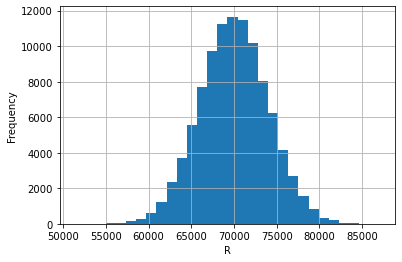


Input Variable E:
count    100000.00
mean     -43005.05
std        2003.10
min      -50907.06
25%      -44355.53
50%      -43002.39
75%      -41647.04
max      -33501.89
Name: E, dtype: float64

Histogram:


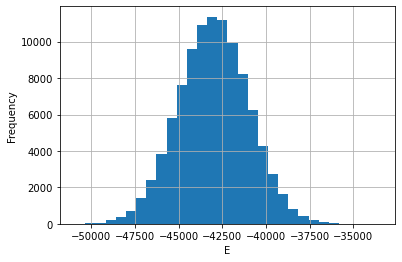


Input Variable SV:
count    100000.00
mean       1999.10
std         577.72
min        1000.03
25%        1498.79
50%        2001.04
75%        2499.40
max        2999.99
Name: SV, dtype: float64

Histogram:


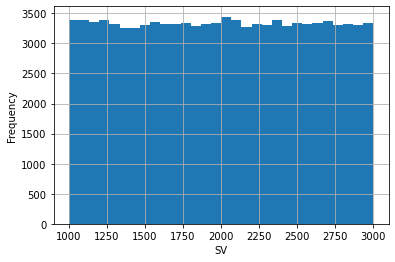


Input Variable Life:
count    100000.00
mean         10.00
std           1.42
min           8.00
25%           9.00
50%          10.00
75%          11.00
max          12.00
Name: Life, dtype: float64

Histogram:


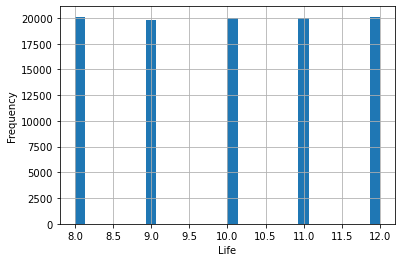

In [9]:
# Show input variables statistics and distribution
sim_model.show_inputs_values()


Output Variable PW:
count     99991.00
mean      31112.98
std       34409.06
min     -106150.23
25%        7136.87
50%       29770.09
75%       53739.07
max      168777.87
Name: PW, dtype: float64

Histogram:


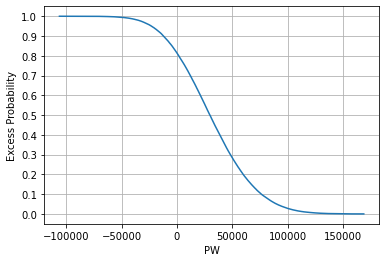


Output Variable IRR:
count    99954.00
mean         0.12
std          0.05
min         -0.12
25%          0.09
50%          0.12
75%          0.15
max          0.28
Name: IRR, dtype: float64

Histogram:


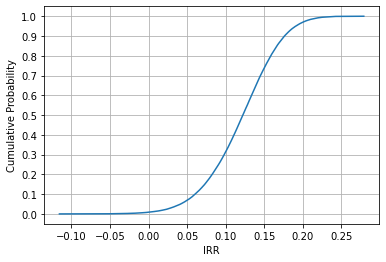

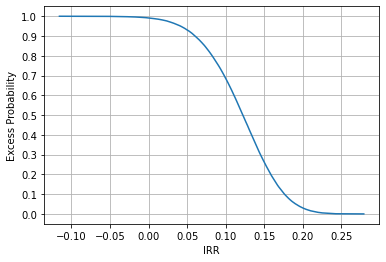

In [10]:
# show output variables statistics and distribution
sim_model.show_outputs_values()

In [11]:
# Perform probabilistic risk analysis on output variable PW
sim_model.Prob_Analysis_DCF('PW', 
            downsides=[-10000, -5000, 0],
            upsides=[20000, 40000, 60000, 80000, 100000])


Probabilistic Analysis on PW
  EV = 31,073.67
  SD = 34,312.21
Downside Risks:
  Pr(PW <= -10,000) = 11.27%
  Pr(PW <=  -5,000) = 14.63%
  Pr(PW <=       0) = 18.59%
Upside Potentials:
  Pr(PW >=  20,000) = 61.32%
  Pr(PW >=  40,000) = 38.61%
  Pr(PW >=  60,000) = 19.84%
  Pr(PW >=  80,000) = 8.39%
  Pr(PW >= 100,000) = 2.77%
Value-at-Risk:
  VaR(99%) =  43,093.17
  VaR(95%) =  23,050.16
  VaR(90%) =  12,178.78


In [12]:
# Perform probabilistic risk analysis on output variable IRR
marr = fixed_vars['marr']
sim_model.Prob_Analysis_rate('IRR', marr,
            downsides =[marr-0.02, marr-0.04], 
            upsides=[0.10, 0.15, 0.20])


Probabilistic Analysis on IRR:
  EV = 12.00%
  SD = 4.55%
Downside Risks:
  Pr(IRR <=  8.0%) = 18.59%
  Pr(IRR <=  6.0%) = 9.86%
  Pr(IRR <=  4.0%) = 4.71%
Upside Potentials:
  Pr(IRR >= 10.0%) = 68.62%
  Pr(IRR >= 15.0%) = 26.27%
  Pr(IRR >= 20.0%) = 3.03%
